# Classificatior Models Created

Here i present several models to the mnist dataset as baseline

1 NN 784 - 128 - 10

2 CNN - TODO

Created by: Tiago Almeida 03/02/2018

In [1]:

##imports
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import utils as ut # auxiliar file to help in data visualization

#tensorflow version when notebook was created - 1.4.0
tf.__version__


'1.4.0'

### Data mnist

Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz


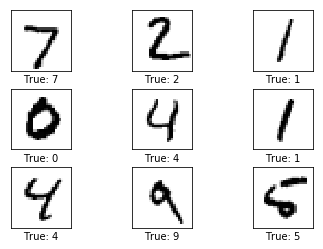

In [2]:
mnist_flat_size = 784

#mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./data")

#reset graph using during notebook development
tf.reset_default_graph()

ut.plot_mnist_images_label(mnist.test.images[0:9],mnist.test.labels[0:9])

### NN model

In [3]:
X = tf.placeholder(tf.float32,shape=(None,784),name = "input")
Y = tf.placeholder(tf.float32,shape=(None,10),name = "y")

Classifier_dimentions = [784,128,10]
def classifier(x,name):
    '''
    Classifier network
    
    :param x: tensor with shape (M,784) here M = number of samples
    :return: tensor with shape (M,10) corresponding to the logits
    '''
    with tf.name_scope("classifier_"+name):
        he_init = tf.contrib.layers.variance_scaling_initializer()
        
        d_net = tf.layers.dense(x,Classifier_dimentions[1],
                                    activation=tf.nn.relu,
                                    name='hidden1_'+name,kernel_initializer=he_init)
        for i in range(2,len(Classifier_dimentions)-1):#loop throw hidden layers
            d_net = tf.layers.dense(d_net,Classifier_dimentions[i],
                                    activation=tf.nn.relu,
                                    name='hidden_'+str(i)+name,kernel_initializer=he_init)

        return tf.layers.dense(d_net,Classifier_dimentions[-1],activation=None,name='output_'+name,kernel_initializer=he_init)

clf_nn = classifier(X,"clf_nn")

with tf.name_scope("loss_nn"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=clf_nn)
    loss_nn = tf.reduce_mean(xentropy)

lr = 0.001
with tf.name_scope("train_nn"):
    clf_nn_variables = [var for var in tf.trainable_variables() if 'clf_nn' in var.name] #this line is optional but i want to keep consistence
    train_nn_op = tf.train.AdamOptimizer(lr).minimize(loss_nn,var_list=clf_nn_variables)
    
with tf.name_scope("predict_nn"):
    predict_nn = tf.argmax(clf_nn, 1)
    acc_nn = tf.reduce_mean(tf.cast(tf.equal(predict_nn, tf.argmax(Y, 1)), tf.float32))

### It's trainning time

Epoach: 0 Loss: 2.3292 Acc: 0.2068


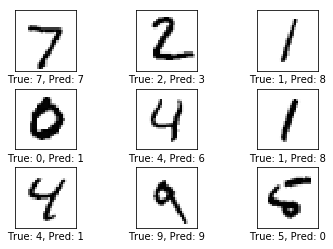

Epoach: 100 Loss: 0.369067 Acc: 0.9131
Epoach: 200 Loss: 0.256695 Acc: 0.9266
Epoach: 300 Loss: 0.257392 Acc: 0.9342
Epoach: 400 Loss: 0.183921 Acc: 0.9417
Epoach: 500 Loss: 0.139749 Acc: 0.9465
Epoach: 600 Loss: 0.117113 Acc: 0.9516
Epoach: 700 Loss: 0.164413 Acc: 0.9558
Epoach: 800 Loss: 0.100118 Acc: 0.9567
Epoach: 900 Loss: 0.171816 Acc: 0.9601
Epoach: 1000 Loss: 0.172569 Acc: 0.9603


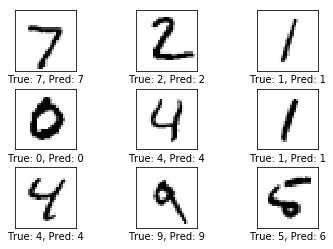

Epoach: 1100 Loss: 0.153652 Acc: 0.9647
Epoach: 1200 Loss: 0.0547216 Acc: 0.966
Epoach: 1300 Loss: 0.110033 Acc: 0.966
Epoach: 1400 Loss: 0.14068 Acc: 0.9684
Epoach: 1500 Loss: 0.0500407 Acc: 0.9682
Epoach: 1600 Loss: 0.0486423 Acc: 0.9699
Epoach: 1700 Loss: 0.103829 Acc: 0.9683
Epoach: 1800 Loss: 0.0808872 Acc: 0.9702
Epoach: 1900 Loss: 0.0430444 Acc: 0.9704
Epoach: 2000 Loss: 0.0438076 Acc: 0.972


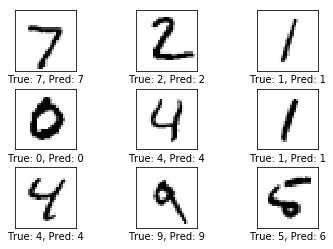

Epoach: 2100 Loss: 0.126098 Acc: 0.9718
Epoach: 2200 Loss: 0.0386448 Acc: 0.9736
Epoach: 2300 Loss: 0.0726359 Acc: 0.9746
Epoach: 2400 Loss: 0.0724899 Acc: 0.9747
Epoach: 2500 Loss: 0.0237272 Acc: 0.9746
Epoach: 2600 Loss: 0.109812 Acc: 0.9755
Epoach: 2700 Loss: 0.0659371 Acc: 0.9744
Epoach: 2800 Loss: 0.095021 Acc: 0.9751
Epoach: 2900 Loss: 0.0855788 Acc: 0.976
Epoach: 3000 Loss: 0.0376029 Acc: 0.9761


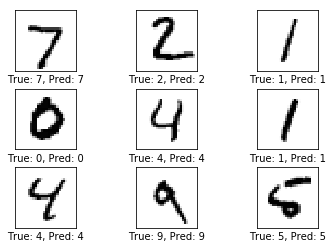

Epoach: 3100 Loss: 0.0838179 Acc: 0.9754
Epoach: 3200 Loss: 0.0561787 Acc: 0.9762
Epoach: 3300 Loss: 0.0267967 Acc: 0.9744
Epoach: 3400 Loss: 0.021301 Acc: 0.9777
Epoach: 3500 Loss: 0.0562351 Acc: 0.9774
Epoach: 3600 Loss: 0.0388682 Acc: 0.9778
Epoach: 3700 Loss: 0.0822767 Acc: 0.9775
Epoach: 3800 Loss: 0.0395293 Acc: 0.9771
Epoach: 3900 Loss: 0.0238224 Acc: 0.9779
Epoach: 4000 Loss: 0.00757837 Acc: 0.9779


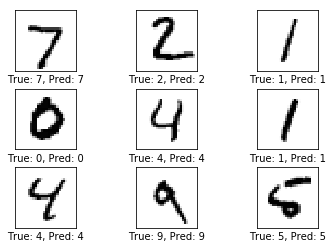

Epoach: 4100 Loss: 0.039791 Acc: 0.978
Epoach: 4200 Loss: 0.0345986 Acc: 0.9789
Epoach: 4300 Loss: 0.0242968 Acc: 0.9751
Epoach: 4400 Loss: 0.0199717 Acc: 0.9767
Epoach: 4500 Loss: 0.0100521 Acc: 0.9773
Epoach: 4600 Loss: 0.0429526 Acc: 0.9784
Epoach: 4700 Loss: 0.0181103 Acc: 0.9776
Epoach: 4800 Loss: 0.0218918 Acc: 0.9784
Epoach: 4900 Loss: 0.0233395 Acc: 0.9788
Epoach: 5000 Loss: 0.0136864 Acc: 0.9774


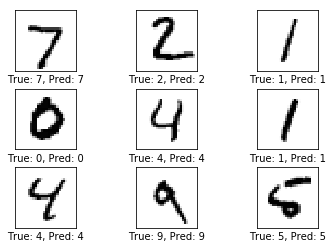

Epoach: 5100 Loss: 0.0248261 Acc: 0.9791
Epoach: 5200 Loss: 0.0354752 Acc: 0.9788
Epoach: 5300 Loss: 0.0214355 Acc: 0.9784
Epoach: 5400 Loss: 0.018951 Acc: 0.9802
Epoach: 5500 Loss: 0.0138775 Acc: 0.9791
Epoach: 5600 Loss: 0.0109212 Acc: 0.9771
Epoach: 5700 Loss: 0.0100535 Acc: 0.9771
Epoach: 5800 Loss: 0.0138099 Acc: 0.978
Epoach: 5900 Loss: 0.00931223 Acc: 0.9794
Epoach: 6000 Loss: 0.0511107 Acc: 0.9769


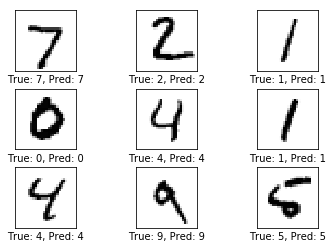

Epoach: 6100 Loss: 0.00713766 Acc: 0.9786
Epoach: 6200 Loss: 0.0104368 Acc: 0.978
Epoach: 6300 Loss: 0.00996478 Acc: 0.9781
Epoach: 6400 Loss: 0.0163377 Acc: 0.9788
Epoach: 6500 Loss: 0.00844192 Acc: 0.9789
Epoach: 6600 Loss: 0.00632191 Acc: 0.9786
Epoach: 6700 Loss: 0.0157434 Acc: 0.9781
Epoach: 6800 Loss: 0.011673 Acc: 0.9776
Epoach: 6900 Loss: 0.0108012 Acc: 0.9794
Epoach: 7000 Loss: 0.0078262 Acc: 0.9789


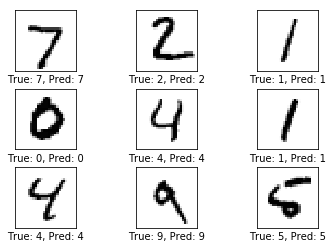

Epoach: 7100 Loss: 0.0106695 Acc: 0.978
Epoach: 7200 Loss: 0.00498721 Acc: 0.9791
Epoach: 7300 Loss: 0.0163429 Acc: 0.9787
Epoach: 7400 Loss: 0.00449682 Acc: 0.9792
Epoach: 7500 Loss: 0.00778933 Acc: 0.9795
Epoach: 7600 Loss: 0.012888 Acc: 0.9778
Epoach: 7700 Loss: 0.0140001 Acc: 0.9796
Epoach: 7800 Loss: 0.00214173 Acc: 0.9799
Epoach: 7900 Loss: 0.00474379 Acc: 0.9782
Epoach: 8000 Loss: 0.00287489 Acc: 0.9798


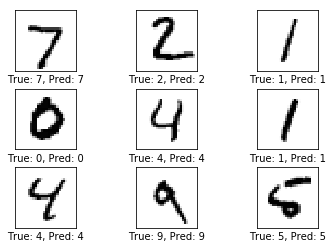

Epoach: 8100 Loss: 0.00309973 Acc: 0.9797
Epoach: 8200 Loss: 0.00113848 Acc: 0.9785
Epoach: 8300 Loss: 0.00594697 Acc: 0.9785
Epoach: 8400 Loss: 0.00920318 Acc: 0.9793
Epoach: 8500 Loss: 0.00993045 Acc: 0.978
Epoach: 8600 Loss: 0.00246535 Acc: 0.978
Epoach: 8700 Loss: 0.00322152 Acc: 0.9797
Epoach: 8800 Loss: 0.00461858 Acc: 0.9784
Epoach: 8900 Loss: 0.00627131 Acc: 0.9782
Epoach: 9000 Loss: 0.0191937 Acc: 0.9768


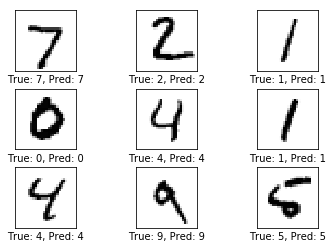

Epoach: 9100 Loss: 0.00215005 Acc: 0.9772
Epoach: 9200 Loss: 0.00218077 Acc: 0.9778
Epoach: 9300 Loss: 0.00954378 Acc: 0.9782
Epoach: 9400 Loss: 0.00769448 Acc: 0.9783
Epoach: 9500 Loss: 0.00535965 Acc: 0.9767
Epoach: 9600 Loss: 0.00300472 Acc: 0.9781
Epoach: 9700 Loss: 0.0066693 Acc: 0.9783
Epoach: 9800 Loss: 0.00177018 Acc: 0.9784
Epoach: 9900 Loss: 0.00209394 Acc: 0.9779


In [4]:
batch_size = 128
epoach = 10000

#tensorflow session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoach):
    
    x_train,y_train = mnist.train.next_batch(batch_size=batch_size)
    
    _,it_loss = sess.run([train_nn_op,loss_nn], feed_dict = {X:x_train, Y:ut.one_hot(y_train)})
    
    if i%100==0:
        print("Epoach:",i,"Loss:",it_loss,"Acc:",acc_nn.eval(session=sess,feed_dict = {X:mnist.test.images, Y:ut.one_hot(mnist.test.labels)}))
        if i%1000==0:
            labels = predict_nn.eval(session=sess, feed_dict = {X:mnist.test.images[0:9], Y:ut.one_hot(mnist.test.labels[0:9])})
            ut.plot_mnist_images_label(mnist.test.images[0:9],mnist.test.labels[0:9],cls_pred=labels)
        
        
    